In [1]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn 

from sklearn import datasets, linear_model, metrics, tree
from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import ElasticNet, Lasso,  RidgeCV

from sklearn.neighbors import KNeighborsRegressor

        
# Dataset splitting        
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV

# Errors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib

In [2]:
df_dia = pd.read_csv("hao_all_dia_scaled_0829.csv")
df_dia

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0            1             1               1                 1   
1            2             2               2                 2   
2            3             3               3                 3   
3            4             4               4                 4   
4            5             5               5                 5   
..         ...           ...             ...               ...   
67         210           210             210               210   
68         211           211             211               211   
69         213           213             213               213   
70         217           217             217               217   
71         218           218             218               218   

    in_amount_mmol  p_amount_mmol  sol_amount_ml  TOP_amount_mmol  \
0         0.055436      -0.361432      -0.528015         1.958217   
1         0.782458       0.017999      -0.528015         0.600491   
2         0.782458       0.017999      -0.528015         0.600491   
3         0.055436       0.280681      -0.528015         1.958217   
4         0.055436       0.280681      -0.528015         1.958217   
..             ...            ...            ...              ...   
67        1.253370       1.448160      -0.528015         3.813777   
68        1.253370       1.448160      -0.528015         3.813777   
69       -0.580709      -0.667895      -0.070987        -0.304661   
70       -0.423738      -0.631411      -0.201566        -0.304661   
71       -0.423738      -0.631411      -0.201566        -0.304661   

    acid_amount_mmol  amine_amount_mmol  ...  x8_oleic acid  x8_superhydride  \
0          -0.431077          -0.641827  ...            0.0              0.0   
1          -0.431077          -0.641827  ...            0.0              0.0   
2          -0.431077          -0.641827  ...            0.0              0.0   
3          -0.431077          -0.641827  ...            0.0              0.0   
4          -0.431077          -0.641827  ...            0.0              0.0   
..               ...                ...  ...            ...              ...   
67         -0.431077          -0.641827  ...            0.0              0.0   
68         -0.431077          -0.641827  ...            0.0              0.0   
69         -0.316033          -0.641827  ...            0.0              0.0   
70         -0.085945          -0.600008  ...            0.0              0.0   
71         -0.085945          -0.600008  ...            0.0              0.0   

    x8_tetrabutylammonium myristate  x8_trioctylamine  \
0                               0.0               0.0   
1                               0.0               0.0   
2                               0.0               0.0   
3                               0.0               0.0   
4                               0.0               0.0   
..                              ...               ...   
67                              0.0               0.0   
68                              0.0               0.0   
69                              0.0               0.0   
70                              0.0               0.0   
71                              0.0               0.0   

    x8_trioctylphosphine oxide  x8_water  x8_zinc iodide  diameter_nm  abs_nm  \
0                          1.0       0.0             0.0         2.60   530.0   
1                          1.0       0.0             0.0         3.50   595.0   
2                          1.0       0.0             0.0         4.60   650.0   
3                          1.0       0.0             0.0         2.52   520.0   
4                          1.0       0.0             0.0         2.66   590.0   
..                         ...       ...             ...          ...     ...   
67                         1.0       0.0             0.0         4.80   689.0   
68                         1.0       0.0             0.0         6.00   729.0   
69     

In [3]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium palmitate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc octanoate',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide',
             'abs_nm',
             'emission_nm'
            ]

output_col = ['diameter_nm']

X = df_dia[input_col]

Y = df_dia[output_col]

In [4]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [5]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [01:49<00:00,  5.48s/it]

0.4227272727272728 11 1 45


### 2. Decision Trees

In [6]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [00:31<00:00,  1.55s/it]

0.37939393939393945 6 16 20


Mean absolute error = 0.288


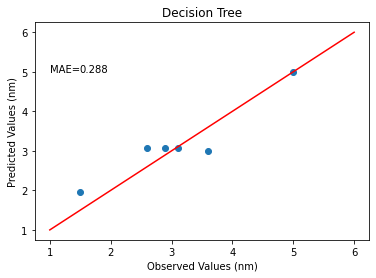

In [24]:
DT_regr = DecisionTreeRegressor(max_depth=4,
                                max_features=4,
                                random_state=40)
            
DT_regr.fit(X_train, np.ravel(Y_train))
            
DT_Y_pred = DT_regr.predict(X_test)
            
DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
print("Mean absolute error =", round(DT_mae,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, DT_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([1,6],[1,6], color = 'r')
plt.text(1, 5, 'MAE=' , fontdict=None)
plt.text(1.49, 5, round(DT_mae,3) , fontdict=None)
plt.show()

### 3. Random Forrest 

In [9]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:59<00:00,  8.97s/it]

0.4311363636363636 10 3 48


Mean absolute error = 0.247 
 0.173


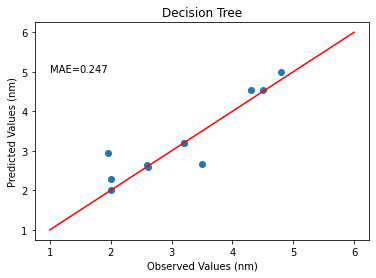

In [13]:
RF_regr = RandomForestRegressor(max_depth=10, 
                                n_estimators=2, 
                                max_features=42,
                                random_state=45)
            
RF_regr.fit(X_train, np.ravel(Y_train))
            
RF_Y_pred = RF_regr.predict(X_test)
            
RF_mae = mean_absolute_error(Y_test, RF_Y_pred)
RF_mse = mean_squared_error(Y_test, RF_Y_pred)
print("Mean absolute error =", round(RF_mae,3), '\n', round(RF_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, RF_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([1,6],[1,6], color = 'r')
plt.text(1, 5, 'MAE=' , fontdict=None)
plt.text(1.49, 5, round(RF_mae,3) , fontdict=None)
plt.show()

### 4. Extra Trees

In [ ]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

 90%|█████████ | 18/20 [01:37<00:14,  7.46s/it]

### 5. Gradient Boosting

In [10]:
min_mae = 999
min_i, min_j, min_k, min_l = 0, 0, 0.0, 0
for i in tqdm(range(300, 400, 10)):
    for j in range(2, 40, 2):
        for k in np.arange(0.04, 0.22, 0.02):
            for l in range(2, 10, 2):
                GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k, random_state=l)
                GB_regr.fit(X_train, np.ravel(Y_train))
                GB_Y_pred = GB_regr.predict(X_test)

                mae = mean_absolute_error(Y_test, GB_Y_pred)
                if (min_mae > mae):
                    min_mae = mae
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(min_mae, min_i, min_j, min_k, min_l)

100%|██████████| 10/10 [24:11<00:00, 145.19s/it]

0.6822282789482619 390 6 0.15999999999999998 4


### 6. Others

In [11]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  0.6472727272727273 

Ridge
 MAE for diameter is  0.5450683423202225 

Lasso
 MAE for diameter is  0.5527007758166047 

ElasticNet
 MAE for diameter is  0.5576221173542989 



### Conclusion

Random Forest has the best performance

In [14]:
RF_regr = RandomForestRegressor(max_depth=10, 
                                n_estimators=2, 
                                max_features=42,
                                random_state=45)
            

RF_regr.fit(X_train, np.ravel(Y_train))
RF_Y_pred = RF_regr.predict(X_test)

joblib.dump(RF_regr, "./model_Random_Forest_diameter.joblib")

['./model_Random_Forest_diameter.joblib']